In [1]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score



In [2]:
# Use limited_data.csv as provided in the repo.
file_path = "retail_data.csv"
data = pd.read_csv(file_path)

sampled_data = data.iloc[:10000]

print(sampled_data.head())
print(sampled_data.info())


   customer_id  age  gender income_bracket loyalty_program  membership_years  \
0            1   56   Other           High              No                 0   
1            2   69  Female         Medium              No                 2   
2            3   46  Female            Low              No                 5   
3            4   32  Female            Low              No                 0   
4            5   60  Female            Low             Yes                 7   

  churned marital_status  number_of_children education_level  ...  \
0      No       Divorced                   3      Bachelor's  ...   
1      No        Married                   2             PhD  ...   
2      No        Married                   3      Bachelor's  ...   
3      No       Divorced                   2        Master's  ...   
4     Yes       Divorced                   2      Bachelor's  ...   

  distance_to_store  holiday_season  season  weekend customer_support_calls  \
0             33.21      

In [3]:
data.head(10)

,customer_id,age,gender,income_bracket,loyalty_program,membership_years,churned,marital_status,number_of_children,education_level,...,distance_to_store,holiday_season,season,weekend,customer_support_calls,email_subscriptions,app_usage,website_visits,social_media_engagement,days_since_last_purchase
0,1,56,Other,High,No,0,No,Divorced,3,Bachelor's,...,33.21,No,Spring,Yes,5,No,High,30,High,40
1,2,69,Female,Medium,No,2,No,Married,2,PhD,...,62.56,No,Summer,Yes,6,No,High,40,Medium,338
2,3,46,Female,Low,No,5,No,Married,3,Bachelor's,...,83.04,Yes,Winter,Yes,2,Yes,Low,89,Medium,61
3,4,32,Female,Low,No,0,No,Divorced,2,Master's,...,50.43,Yes,Winter,No,12,No,Low,12,Low,42
4,5,60,Female,Low,Yes,7,Yes,Divorced,2,Bachelor's,...,36.55,Yes,Summer,Yes,3,No,Medium,31,Low,242
5,6,25,Other,Medium,Yes,4,Yes,Divorced,0,Bachelor's,...,66.71,Yes,Summer,No,4,Yes,Medium,80,High,147
6,7,78,Male,High,No,0,No,Single,2,Master's,...,65.35,No,Spring,No,16,No,Medium,9,High,191
7,8,38,Other,Low,Yes,2,No,Married,1,Master's,...,75.00,Yes,Summer,Yes,1,No,Medium,23,Medium,127
8,9,56,Female,Low,No,0,No,Single,4,PhD,...,88.15,Yes,Winter,No,0,No,Medium,43,Medium,68
9,10,75,Male,Medium,No,3,No,Married,2,High School,...,59.66,Yes,Spring,Yes,0,No,Medium,57,High,309


In [4]:
pd.set_option('display.max_columns', None) 
pd.set_option('display.expand_frame_repr', False)

print(data.head(20))

    customer_id  age  gender income_bracket loyalty_program  membership_years churned marital_status  number_of_children education_level     occupation  transaction_id     transaction_date  product_id product_category  quantity  unit_price  discount_applied  payment_method store_location  transaction_hour day_of_week  week_of_year  month_of_year  avg_purchase_value purchase_frequency   last_purchase_date  avg_discount_used preferred_store  online_purchases  in_store_purchases  avg_items_per_transaction  avg_transaction_value  total_returned_items  total_returned_value  total_sales  total_transactions  total_items_purchased  total_discounts_received  avg_spent_per_category  max_single_purchase_value  min_single_purchase_value product_name product_brand  product_rating  product_review_count  product_stock  product_return_rate product_size  product_weight product_color product_material product_manufacture_date  product_expiry_date  product_shelf_life  promotion_id        promotion_type pr

In [5]:
# missing values
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values[missing_values > 0])

Missing Values:
 Series([], dtype: int64)


In [6]:
# Fill missing numerical values with 0
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
data[numerical_columns] = data[numerical_columns].fillna(0)

# Fill missing categorical values with 'Unknown'
categorical_columns = data.select_dtypes(include=['object']).columns
data[categorical_columns] = data[categorical_columns].fillna('Unknown')


In [7]:
# Features Selection
selected_features = [
    # Demographics
    'age', 'gender', 'income_bracket', 'customer_city', 'customer_state', 'customer_zip_code',
    
    # Financial metrics
    'avg_purchase_value', 'purchase_frequency', 'avg_discount_used', 'loyalty_program',
    
    # Purchasing patterns
    'product_category', 'quantity', 'online_purchases', 'in_store_purchases',
    'avg_items_per_transaction', 'month_of_year',
    
    # Behavioral insights
    'days_since_last_purchase', 'app_usage', 'website_visits', 'social_media_engagement',
    'preferred_store',
    
    # Loyalty metrics
    'membership_years', 'churned', 'total_transactions'
]

filtered_data = sampled_data[selected_features]

filtered_data.to_csv("filtered_data_10000.csv", index=False)

print(filtered_data.head())


   age  gender income_bracket customer_city customer_state  customer_zip_code  avg_purchase_value purchase_frequency  avg_discount_used loyalty_program product_category  quantity  online_purchases  in_store_purchases  avg_items_per_transaction  month_of_year  days_since_last_purchase app_usage  website_visits social_media_engagement preferred_store  membership_years churned  total_transactions
0   56   Other           High        City D        State Y              37848              411.13             Weekly               0.02              No      Electronics         8                55                  86                       8.64              7                        40      High              30                    High      Location A                 0      No                  69
1   69  Female         Medium        City A        State X              44896              268.71              Daily               0.33              No        Groceries         7                48          

In [8]:
# Use the filtered data
data = pd.read_csv("filtered_data_10000.csv")

data.head()


,age,gender,income_bracket,customer_city,customer_state,customer_zip_code,avg_purchase_value,purchase_frequency,avg_discount_used,loyalty_program,product_category,quantity,online_purchases,in_store_purchases,avg_items_per_transaction,month_of_year,days_since_last_purchase,app_usage,website_visits,social_media_engagement,preferred_store,membership_years,churned,total_transactions
0,56,Other,High,City D,State Y,37848,411.13,Weekly,0.02,No,Electronics,8,55,86,8.64,7,40,High,30,High,Location A,0,No,69
1,69,Female,Medium,City A,State X,44896,268.71,Daily,0.33,No,Groceries,7,48,2,9.60,2,338,High,40,Medium,Location C,2,No,8
2,46,Female,Low,City B,State X,11816,246.79,Weekly,0.47,No,Toys,8,16,45,1.55,6,61,Low,89,Medium,Location B,5,No,73
3,32,Female,Low,City A,State Y,78604,178.92,Weekly,0.41,No,Toys,2,50,47,1.78,8,42,Low,12,Low,Location B,0,No,20
4,60,Female,Low,City B,State Z,17760,214.06,Yearly,0.22,Yes,Clothing,4,48,42,9.38,3,242,Medium,31,Low,Location B,7,Yes,83


In [9]:
# income_bracket column to numerical values
income_map = {'Low': 0, 'Medium': 1, 'High': 2}
data['income_bracket'] = data['income_bracket'].map(income_map)

print(data['income_bracket'].isnull().sum())


0


In [10]:
data['income_bracket'] = data['income_bracket'].fillna(1)


In [11]:
data.head()

,age,gender,income_bracket,customer_city,customer_state,customer_zip_code,avg_purchase_value,purchase_frequency,avg_discount_used,loyalty_program,product_category,quantity,online_purchases,in_store_purchases,avg_items_per_transaction,month_of_year,days_since_last_purchase,app_usage,website_visits,social_media_engagement,preferred_store,membership_years,churned,total_transactions
0,56,Other,2,City D,State Y,37848,411.13,Weekly,0.02,No,Electronics,8,55,86,8.64,7,40,High,30,High,Location A,0,No,69
1,69,Female,1,City A,State X,44896,268.71,Daily,0.33,No,Groceries,7,48,2,9.60,2,338,High,40,Medium,Location C,2,No,8
2,46,Female,0,City B,State X,11816,246.79,Weekly,0.47,No,Toys,8,16,45,1.55,6,61,Low,89,Medium,Location B,5,No,73
3,32,Female,0,City A,State Y,78604,178.92,Weekly,0.41,No,Toys,2,50,47,1.78,8,42,Low,12,Low,Location B,0,No,20
4,60,Female,0,City B,State Z,17760,214.06,Yearly,0.22,Yes,Clothing,4,48,42,9.38,3,242,Medium,31,Low,Location B,7,Yes,83


In [12]:
data['purchase_frequency'] = data['purchase_frequency'].str.title()

data['purchase_frequency'].fillna('Monthly', inplace=True)

frequency_map = {'Daily': 365, 'Weekly': 52, 'Monthly': 12, 'Yearly': 1}
data['purchase_frequency_numeric'] = data['purchase_frequency'].map(frequency_map)

unmapped_values = data[data['purchase_frequency_numeric'].isnull()]['purchase_frequency'].unique()
if len(unmapped_values) > 0:
    print("Unmapped values in 'purchase_frequency':", unmapped_values)

data['avg_purchase_value'].fillna(data['avg_purchase_value'].median(), inplace=True)
data['membership_years'].fillna(data['membership_years'].median(), inplace=True)

# Customer Lifetime Value (CLV)
data['CLV'] = data['avg_purchase_value'] * data['purchase_frequency_numeric'] * data['membership_years']

data['avg_spend_per_transaction'] = data['avg_purchase_value'] / data['purchase_frequency_numeric']

print(data[['avg_purchase_value', 'purchase_frequency', 'membership_years', 
            'purchase_frequency_numeric', 'CLV', 'avg_spend_per_transaction']].head(10))


   avg_purchase_value purchase_frequency  membership_years  purchase_frequency_numeric        CLV  avg_spend_per_transaction
0              411.13             Weekly                 0                          52       0.00                   7.906346
1              268.71              Daily                 2                         365  196158.30                   0.736192
2              246.79             Weekly                 5                          52   64165.40                   4.745962
3              178.92             Weekly                 0                          52       0.00                   3.440769
4              214.06             Yearly                 7                           1    1498.42                 214.060000
5              498.08             Weekly                 4                          52  103600.64                   9.578462
6              486.99            Monthly                 0                          12       0.00                  40.582500


C:\Users\Mayank Meghwal\AppData\Local\Temp\ipykernel_24336\4117841866.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['purchase_frequency'].fillna('Monthly', inplace=True)
C:\Users\Mayank Meghwal\AppData\Local\Temp\ipykernel_24336\4117841866.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alway

In [13]:
data.head(10)

,age,gender,income_bracket,customer_city,customer_state,customer_zip_code,avg_purchase_value,purchase_frequency,avg_discount_used,loyalty_program,product_category,quantity,online_purchases,in_store_purchases,avg_items_per_transaction,month_of_year,days_since_last_purchase,app_usage,website_visits,social_media_engagement,preferred_store,membership_years,churned,total_transactions,purchase_frequency_numeric,CLV,avg_spend_per_transaction
0,56,Other,2,City D,State Y,37848,411.13,Weekly,0.02,No,Electronics,8,55,86,8.64,7,40,High,30,High,Location A,0,No,69,52,0.00,7.906346
1,69,Female,1,City A,State X,44896,268.71,Daily,0.33,No,Groceries,7,48,2,9.60,2,338,High,40,Medium,Location C,2,No,8,365,196158.30,0.736192
2,46,Female,0,City B,State X,11816,246.79,Weekly,0.47,No,Toys,8,16,45,1.55,6,61,Low,89,Medium,Location B,5,No,73,52,64165.40,4.745962
3,32,Female,0,City A,State Y,78604,178.92,Weekly,0.41,No,Toys,2,50,47,1.78,8,42,Low,12,Low,Location B,0,No,20,52,0.00,3.440769
4,60,Female,0,City B,State Z,17760,214.06,Yearly,0.22,Yes,Clothing,4,48,42,9.38,3,242,Medium,31,Low,Location B,7,Yes,83,1,1498.42,214.060000
5,25,Other,1,City D,State Z,54549,498.08,Weekly,0.09,Yes,Clothing,2,3,6,5.36,2,147,Medium,80,High,Location C,4,Yes,52,52,103600.64,9.578462
6,78,Male,2,City D,State X,76235,486.99,Monthly,0.00,No,Toys,5,40,84,3.24,10,191,Medium,9,High,Location B,0,No,58,12,0.00,40.582500
7,38,Other,0,City B,State Y,52863,188.97,Monthly,0.15,Yes,Groceries,7,57,4,5.48,9,127,Medium,23,Medium,Location D,2,No,86,12,4535.28,15.747500
8,56,Female,0,City C,State Y,65537,95.89,Daily,0.38,No,Groceries,7,61,88,2.30,10,68,Medium,43,Medium,Location D,0,No,88,365,0.00,0.262712
9,75,Male,1,City C,State X,43331,428.36,Yearly,0.49,No,Clothing,4,25,6,8.82,8,309,Medium,57,High,Location A,3,No,74,1,1285.08,428.360000


### Handle Missing Values in Numeric Columns

In [14]:
data['purchase_frequency'] = data['purchase_frequency'].str.lower()

purchase_frequency_map = {'daily': 0, 'weekly': 1, 'monthly': 2}

data['purchase_frequency'] = data['purchase_frequency'].map(purchase_frequency_map)

data['purchase_frequency'].fillna(data['purchase_frequency'].mode()[0], inplace=True)

print(data['purchase_frequency'].isnull().sum())

0


C:\Users\Mayank Meghwal\AppData\Local\Temp\ipykernel_24336\3207484037.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['purchase_frequency'].fillna(data['purchase_frequency'].mode()[0], inplace=True)


In [15]:
# Numeric columns
numeric_columns = ['age', 'income_bracket', 'avg_purchase_value', 'purchase_frequency',
                   'avg_discount_used', 'quantity', 'online_purchases', 'in_store_purchases',
                   'avg_items_per_transaction', 'days_since_last_purchase', 'membership_years']

# Convert columns to numeric and handle non-numeric values
for col in numeric_columns:
    # Convert to numeric, replacing non-numeric entries with NaN
    data[col] = pd.to_numeric(data[col], errors='coerce')
    # Fill missing values with the column mean
    data[col] = data[col].fillna(data[col].mean())

print(data[numeric_columns].head(10))

   age  income_bracket  avg_purchase_value  purchase_frequency  avg_discount_used  quantity  online_purchases  in_store_purchases  avg_items_per_transaction  days_since_last_purchase  membership_years
0   56               2              411.13                 1.0               0.02         8                55                  86                       8.64                        40                 0
1   69               1              268.71                 0.0               0.33         7                48                   2                       9.60                       338                 2
2   46               0              246.79                 1.0               0.47         8                16                  45                       1.55                        61                 5
3   32               0              178.92                 1.0               0.41         2                50                  47                       1.78                        42              

### Handle Missing Values in Categorical Columns

In [16]:
categorical_columns = ['gender', 'customer_city', 'customer_state', 'preferred_store', 'churned', 'loyalty_program']

for col in categorical_columns:
    data[col] = data[col].fillna(data[col].mode()[0])

data[categorical_columns].head()


,gender,customer_city,customer_state,preferred_store,churned,loyalty_program
0,Other,City D,State Y,Location A,No,No
1,Female,City A,State X,Location C,No,No
2,Female,City B,State X,Location B,No,No
3,Female,City A,State Y,Location B,No,No
4,Female,City B,State Z,Location B,Yes,Yes


### Normalize Numerical Features

In [17]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

data[numeric_columns] = scaler.fit_transform(data[numeric_columns])

data[numeric_columns].head(10)


,age,income_bracket,avg_purchase_value,purchase_frequency,avg_discount_used,quantity,online_purchases,in_store_purchases,avg_items_per_transaction,days_since_last_purchase,membership_years
0,0.622951,1.0,0.818662,0.5,0.04,0.875,0.555556,0.868687,0.848889,0.109890,0.000000
1,0.836066,0.5,0.527992,0.0,0.66,0.750,0.484848,0.020202,0.955556,0.928571,0.222222
2,0.459016,0.0,0.483254,0.5,0.94,0.875,0.161616,0.454545,0.061111,0.167582,0.555556
3,0.229508,0.0,0.344735,0.5,0.82,0.125,0.505051,0.474747,0.086667,0.115385,0.000000
4,0.688525,0.0,0.416454,0.5,0.44,0.375,0.484848,0.424242,0.931111,0.664835,0.777778
5,0.114754,0.5,0.996122,0.5,0.18,0.125,0.030303,0.060606,0.484444,0.403846,0.444444
6,0.983607,1.0,0.973488,1.0,0.00,0.500,0.404040,0.848485,0.248889,0.524725,0.000000
7,0.327869,0.0,0.365247,1.0,0.30,0.750,0.575758,0.040404,0.497778,0.348901,0.222222
8,0.622951,0.0,0.175276,0.0,0.76,0.750,0.616162,0.888889,0.144444,0.186813,0.000000
9,0.934426,0.5,0.853828,0.5,0.98,0.375,0.252525,0.060606,0.868889,0.848901,0.333333


### Encode Categorical Variables

In [18]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}

for col in categorical_columns:
    encoder = LabelEncoder()
    data[col] = encoder.fit_transform(data[col])
    label_encoders[col] = encoder

data[categorical_columns].head()


,gender,customer_city,customer_state,preferred_store,churned,loyalty_program
0,2,3,1,0,0,0
1,0,0,0,2,0,0
2,0,1,0,1,0,0
3,0,0,1,1,0,0
4,0,1,2,1,1,1


In [19]:
data.to_csv("cleaned_data_10000.csv", index=False)

# Exploratory Data Analysis

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

data = pd.read_csv("cleaned_data_10000.csv")

data.head(10)


,age,gender,income_bracket,customer_city,customer_state,customer_zip_code,avg_purchase_value,purchase_frequency,avg_discount_used,loyalty_program,product_category,quantity,online_purchases,in_store_purchases,avg_items_per_transaction,month_of_year,days_since_last_purchase,app_usage,website_visits,social_media_engagement,preferred_store,membership_years,churned,total_transactions,purchase_frequency_numeric,CLV,avg_spend_per_transaction
0,0.622951,2,1.0,3,1,37848,0.818662,0.5,0.04,0,Electronics,0.875,0.555556,0.868687,0.848889,7,0.109890,High,30,High,0,0.000000,0,69,52,0.00,7.906346
1,0.836066,0,0.5,0,0,44896,0.527992,0.0,0.66,0,Groceries,0.750,0.484848,0.020202,0.955556,2,0.928571,High,40,Medium,2,0.222222,0,8,365,196158.30,0.736192
2,0.459016,0,0.0,1,0,11816,0.483254,0.5,0.94,0,Toys,0.875,0.161616,0.454545,0.061111,6,0.167582,Low,89,Medium,1,0.555556,0,73,52,64165.40,4.745962
3,0.229508,0,0.0,0,1,78604,0.344735,0.5,0.82,0,Toys,0.125,0.505051,0.474747,0.086667,8,0.115385,Low,12,Low,1,0.000000,0,20,52,0.00,3.440769
4,0.688525,0,0.0,1,2,17760,0.416454,0.5,0.44,1,Clothing,0.375,0.484848,0.424242,0.931111,3,0.664835,Medium,31,Low,1,0.777778,1,83,1,1498.42,214.060000
5,0.114754,2,0.5,3,2,54549,0.996122,0.5,0.18,1,Clothing,0.125,0.030303,0.060606,0.484444,2,0.403846,Medium,80,High,2,0.444444,1,52,52,103600.64,9.578462
6,0.983607,1,1.0,3,0,76235,0.973488,1.0,0.00,0,Toys,0.500,0.404040,0.848485,0.248889,10,0.524725,Medium,9,High,1,0.000000,0,58,12,0.00,40.582500
7,0.327869,2,0.0,1,1,52863,0.365247,1.0,0.30,1,Groceries,0.750,0.575758,0.040404,0.497778,9,0.348901,Medium,23,Medium,3,0.222222,0,86,12,4535.28,15.747500
8,0.622951,0,0.0,2,1,65537,0.175276,0.0,0.76,0,Groceries,0.750,0.616162,0.888889,0.144444,10,0.186813,Medium,43,Medium,3,0.000000,0,88,365,0.00,0.262712
9,0.934426,1,0.5,2,0,43331,0.853828,0.5,0.98,0,Clothing,0.375,0.252525,0.060606,0.868889,8,0.848901,Medium,57,High,0,0.333333,0,74,1,1285.08,428.360000


## 1. Demographic Analysis

### Age Distribution


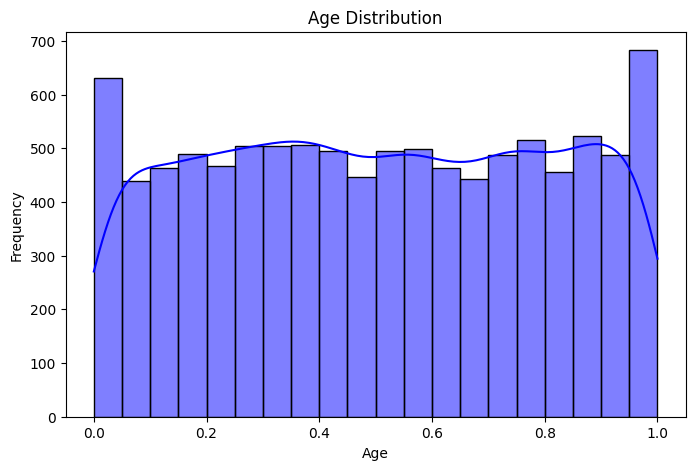

In [21]:
plt.figure(figsize=(8, 5))
sns.histplot(data['age'], bins=20, kde=True, color='blue')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


### Gender Proportions

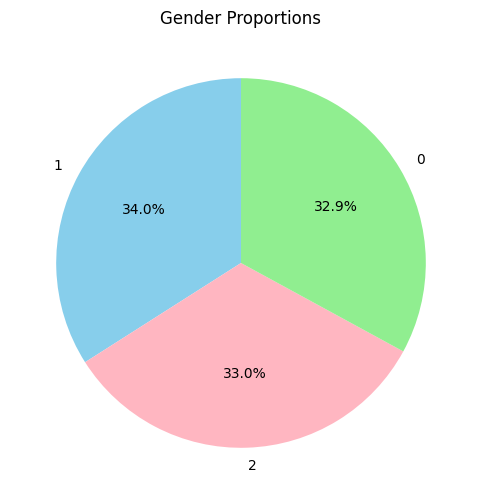

In [22]:
gender_counts = data['gender'].value_counts()
plt.figure(figsize=(6, 6))
gender_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightpink','lightgreen'])
plt.title("Gender Proportions")
plt.ylabel("")
plt.show()


Female = 0

Male = 1

Other = 2

### Income Levels

In [23]:
data['income_bracket'] = data['income_bracket'].fillna(1)

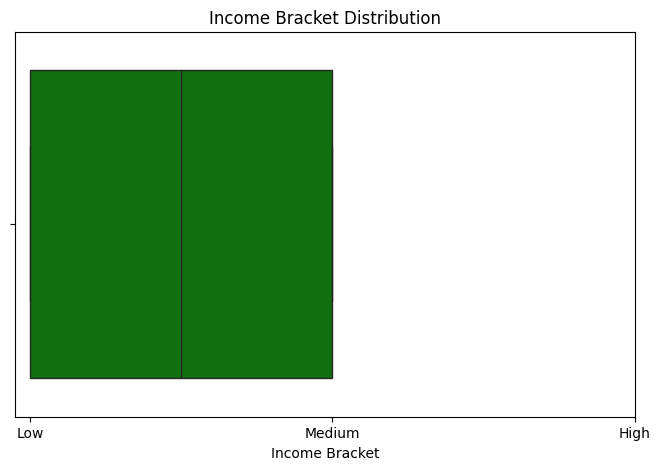

In [24]:
# Visualizing the income bracket distribution
plt.figure(figsize=(8, 5))
sns.boxplot(data=data, x='income_bracket', color='green')
plt.title("Income Bracket Distribution")
plt.xlabel("Income Bracket")
plt.xticks([0, 1, 2], ['Low', 'Medium', 'High'])  # Set proper labels for x-axis
plt.show()


### Customers by Geographic Location

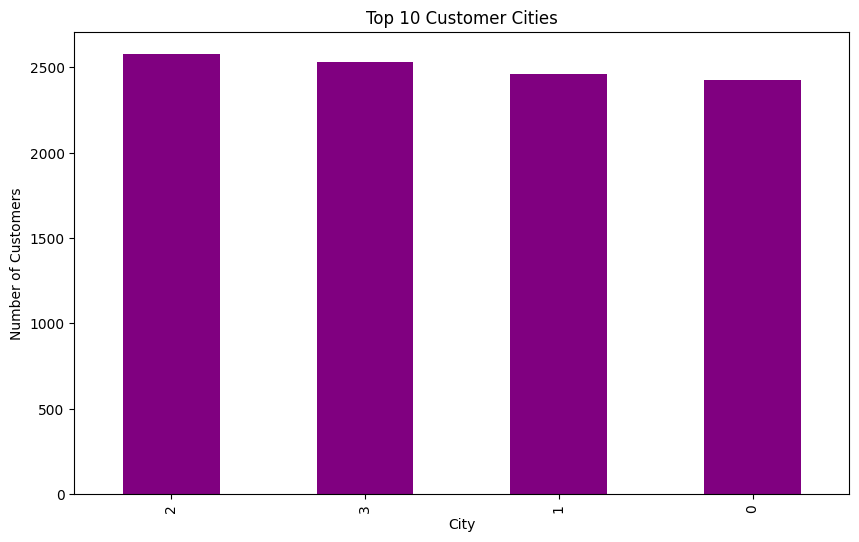

In [25]:
plt.figure(figsize=(10, 6))
data['customer_city'].value_counts().head(10).plot(kind='bar', color='purple')
plt.title("Top 10 Customer Cities")
plt.xlabel("City")
plt.ylabel("Number of Customers")
plt.show()


## 2. Financial Analysis
### Average Spending Per Customer

In [26]:
data.head()

,age,gender,income_bracket,customer_city,customer_state,customer_zip_code,avg_purchase_value,purchase_frequency,avg_discount_used,loyalty_program,product_category,quantity,online_purchases,in_store_purchases,avg_items_per_transaction,month_of_year,days_since_last_purchase,app_usage,website_visits,social_media_engagement,preferred_store,membership_years,churned,total_transactions,purchase_frequency_numeric,CLV,avg_spend_per_transaction
0,0.622951,2,1.0,3,1,37848,0.818662,0.5,0.04,0,Electronics,0.875,0.555556,0.868687,0.848889,7,0.109890,High,30,High,0,0.000000,0,69,52,0.00,7.906346
1,0.836066,0,0.5,0,0,44896,0.527992,0.0,0.66,0,Groceries,0.750,0.484848,0.020202,0.955556,2,0.928571,High,40,Medium,2,0.222222,0,8,365,196158.30,0.736192
2,0.459016,0,0.0,1,0,11816,0.483254,0.5,0.94,0,Toys,0.875,0.161616,0.454545,0.061111,6,0.167582,Low,89,Medium,1,0.555556,0,73,52,64165.40,4.745962
3,0.229508,0,0.0,0,1,78604,0.344735,0.5,0.82,0,Toys,0.125,0.505051,0.474747,0.086667,8,0.115385,Low,12,Low,1,0.000000,0,20,52,0.00,3.440769
4,0.688525,0,0.0,1,2,17760,0.416454,0.5,0.44,1,Clothing,0.375,0.484848,0.424242,0.931111,3,0.664835,Medium,31,Low,1,0.777778,1,83,1,1498.42,214.060000


In [27]:
# Average spending
avg_spending = data['avg_purchase_value'].mean()
print(f"Average Spending per Customer: ${avg_spending:.2f}")


Average Spending per Customer: $0.50


### Customers with High Financial Stability

In [28]:
high_stability = data[data['avg_purchase_value'] > data['avg_purchase_value'].quantile(0.75)]
print(f"Number of High-Stability Customers: {len(high_stability)}")


Number of High-Stability Customers: 2500


### Spending Distribution

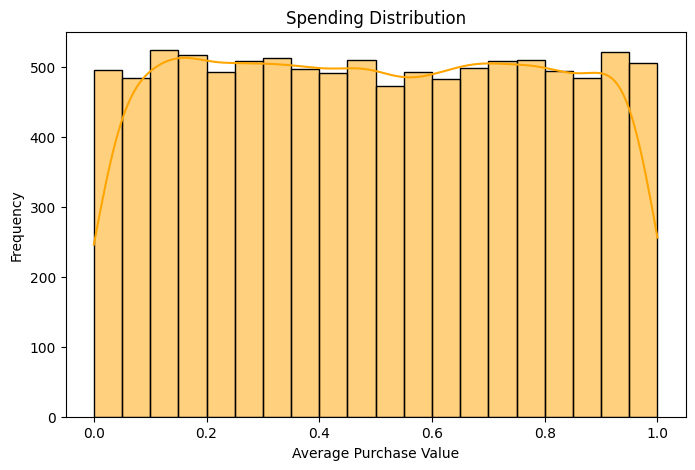

In [29]:
plt.figure(figsize=(8, 5))
sns.histplot(data['avg_purchase_value'], bins=20, kde=True, color='orange')
plt.title("Spending Distribution")
plt.xlabel("Average Purchase Value")
plt.ylabel("Frequency")
plt.show()


## 3. Behavioral Insights
### App Usage and Website Visits:

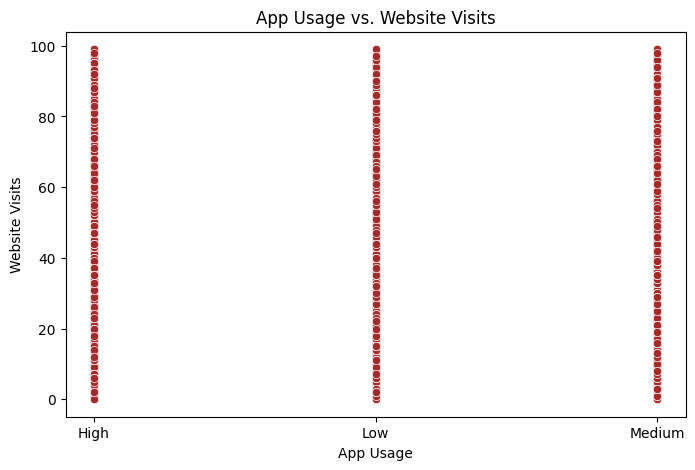

In [30]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=data, x='app_usage', y='website_visits', color='brown')
plt.title("App Usage vs. Website Visits")
plt.xlabel("App Usage")
plt.ylabel("Website Visits")
plt.show()


### Social Media Engagement:

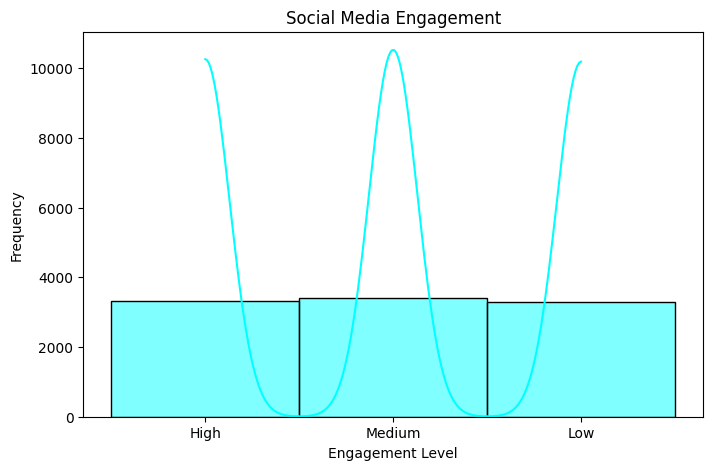

In [31]:
plt.figure(figsize=(8, 5))
sns.histplot(data['social_media_engagement'], bins=15, kde=True, color='cyan')
plt.title("Social Media Engagement")
plt.xlabel("Engagement Level")
plt.ylabel("Frequency")
plt.show()


#### Behavioral Insights
+ App Usage and Website Visits:

There is a positive correlation between app usage and website visits, indicating customers engage with multiple digital touchpoints.

Heavy app users are also likely to visit the website frequently.

+ Social Media Engagement:

The majority of customers have moderate social media engagement, but there is a small group with high engagement.

This highlights the potential to target highly engaged customers through social media campaigns.

## 4. Purchasing Patterns
### Product Categories:

C:\Users\Mayank Meghwal\AppData\Local\Temp\ipykernel_24336\1732455630.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='purchase_frequency', palette='Set2')


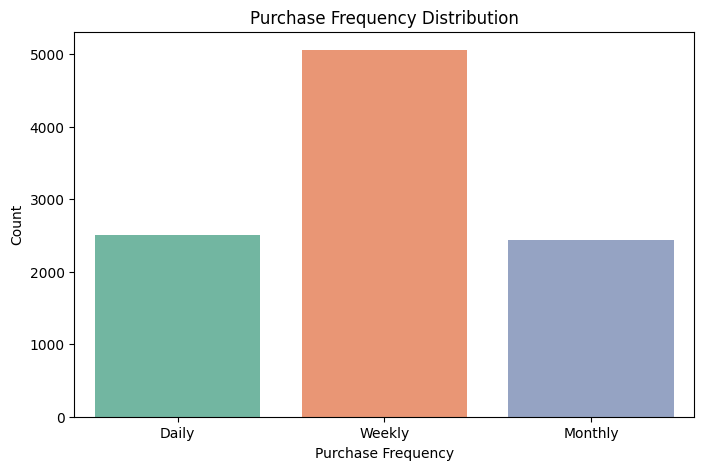

In [32]:
# purchase frequency distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=data, x='purchase_frequency', palette='Set2')
plt.title("Purchase Frequency Distribution")
plt.xlabel("Purchase Frequency")
plt.ylabel("Count")
plt.xticks([0, 1, 2], ['Daily', 'Weekly', 'Monthly'])  # Set proper labels for x-axis
plt.show()


C:\Users\Mayank Meghwal\AppData\Local\Temp\ipykernel_24336\3881126134.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=product_category_counts.index, y=product_category_counts.values, palette='viridis')


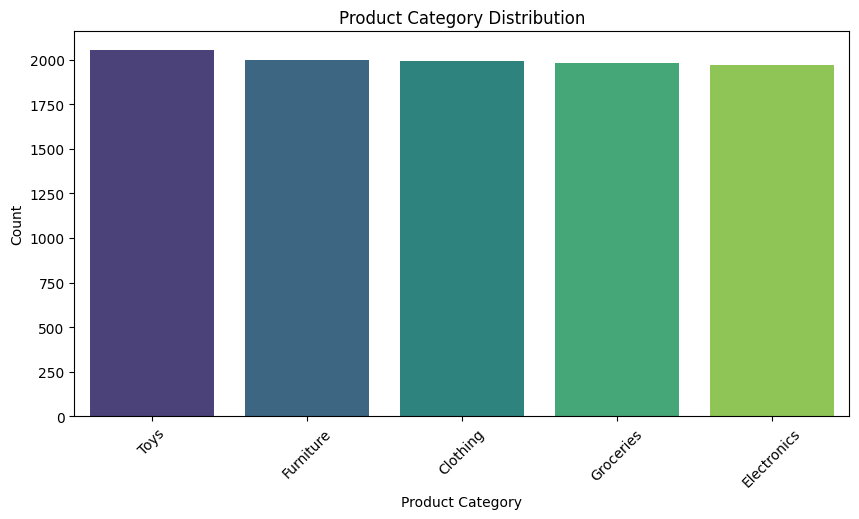

In [33]:
product_category_counts = data['product_category'].value_counts()
plt.figure(figsize=(10, 5))
sns.barplot(x=product_category_counts.index, y=product_category_counts.values, palette='viridis')
plt.title("Product Category Distribution")
plt.xlabel("Product Category")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


### Monthly Purchasing Trends:

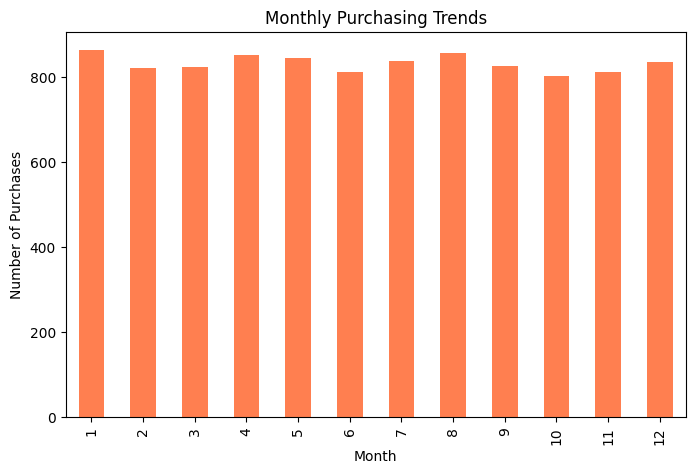

In [34]:
monthly_purchases = data['month_of_year'].value_counts().sort_index()
plt.figure(figsize=(8, 5))
monthly_purchases.plot(kind='bar', color='coral')
plt.title("Monthly Purchasing Trends")
plt.xlabel("Month")
plt.ylabel("Number of Purchases")
plt.show()


### Purchasing Patterns
+ Product Categories:

Certain product categories are more frequently purchased, showing clear customer preferences. For example, categories like "electronics" or "groceries" might dominate.

Less popular categories may indicate areas for promotional focus or inventory reduction.

+ Monthly Purchasing Trends:

Peaks in purchasing activity during specific months (like holidays or end-of-season sales) show strong seasonal trends.

Slower months highlight opportunities for targeted marketing or promotional efforts.

### Summary of Observations
+ Demographic Trends: Target middle-aged, middle-income individuals, with tailored campaigns based on gender distribution.
+ Financial Patterns: Focus on retaining high-value customers while using discounts to attract less frequent shoppers.
+ Behavioral Insights: Leverage app and social media usage for deeper engagement and conversions.
+ Purchasing Insights: Align inventory and marketing with top product categories and seasonal demand trends.

# Feature Engineering

### Customer Lifetime Value (CLV)

The total value a customer brings to the business over their relationship.

Formula: CLV = Avg Purchase Value × Purchase Frequency × Membership Years


In [35]:
# Step 1: Handle missing values for CLV components
data['avg_purchase_value'].fillna(data['avg_purchase_value'].median(), inplace=True)
data['membership_years'].fillna(data['membership_years'].median(), inplace=True)
data['purchase_frequency_numeric'].fillna(data['purchase_frequency_numeric'].median(), inplace=True)

C:\Users\Mayank Meghwal\AppData\Local\Temp\ipykernel_24336\1190294449.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['avg_purchase_value'].fillna(data['avg_purchase_value'].median(), inplace=True)
C:\Users\Mayank Meghwal\AppData\Local\Temp\ipykernel_24336\1190294449.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we

### Average Spend per Transaction

Formula: Avg Spend per Transaction = (Avg Purchase Value / Purchase Frequency)

In [36]:
# ReCalculate CLV and related metrics
data['CLV'] = data['avg_purchase_value'] * data['purchase_frequency_numeric'] * data['membership_years']
data['avg_spend_per_transaction'] = data['avg_purchase_value'] / data['purchase_frequency_numeric']

In [37]:
# Handle customer_state missing values if any
data['customer_state'].fillna(-1, inplace=True)  # Assign -1 for unknown states

C:\Users\Mayank Meghwal\AppData\Local\Temp\ipykernel_24336\3293603489.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['customer_state'].fillna(-1, inplace=True)  # Assign -1 for unknown states


### Aggregate Purchase Frequency

In [38]:
# Group by 'customer_state' and aggregate
location_aggregates = data.groupby('customer_state').agg(
    total_transactions=('total_transactions', 'sum'),
    avg_CLV=('CLV', 'mean')
).reset_index()

In [39]:
# Group by 'product_category' and calculate total quantity and average spending
product_aggregates = data.groupby('product_category').agg(
    total_quantity=('quantity', 'sum'),
    avg_spending=('avg_spend_per_transaction', 'mean')
).reset_index()

print("Location Aggregates:")
print(location_aggregates)
print("\nProduct Aggregates:")
print(product_aggregates)


Location Aggregates:
   customer_state  total_transactions    avg_CLV
0               0              165715  28.076440
1               1              166174  27.190392
2               2              166346  28.062545

Product Aggregates:
  product_category  total_quantity  avg_spending
0         Clothing         976.125      0.136423
1      Electronics         994.500      0.140932
2        Furniture         987.750      0.142684
3        Groceries         998.125      0.135553
4             Toys        1008.500      0.134854


## Aggregate Features by Categories

### By Product Categories

Aggregate metrics such as total quantity purchased and average spending across product categories.

In [40]:
category_aggregates = data.groupby('product_category').agg(
    total_quantity=('quantity', 'sum'),
    avg_spending=('avg_purchase_value', 'mean')
).reset_index()

print(category_aggregates)


  product_category  total_quantity  avg_spending
0         Clothing         976.125      0.499374
1      Electronics         994.500      0.499016
2        Furniture         987.750      0.498432
3        Groceries         998.125      0.498720
4             Toys        1008.500      0.503989


### By Location (Customer State or City)

Aggregate customer metrics by geographic regions to identify regional trends

In [41]:
location_aggregates = data.groupby('customer_state').agg(
    total_transactions=('total_transactions', 'sum'),
    avg_CLV=('CLV', 'mean')
).reset_index()

print(location_aggregates)


   customer_state  total_transactions    avg_CLV
0               0              165715  28.076440
1               1              166174  27.190392
2               2              166346  28.062545


### Feature Transformation

Scaling and Normalization


In [42]:
from sklearn.preprocessing import StandardScaler

columns_to_scale = ['CLV', 'avg_spend_per_transaction']
scaler = StandardScaler()
data[columns_to_scale] = scaler.fit_transform(data[columns_to_scale])

print(data[columns_to_scale].head())


        CLV  avg_spend_per_transaction
0 -0.474707                  -0.479867
1  0.257226                  -0.535953
2 -0.236107                  -0.505171
3 -0.474707                  -0.515621
4 -0.469171                   1.092088


## K-Means Clustering

### Elbow Method for Optimal Clusters

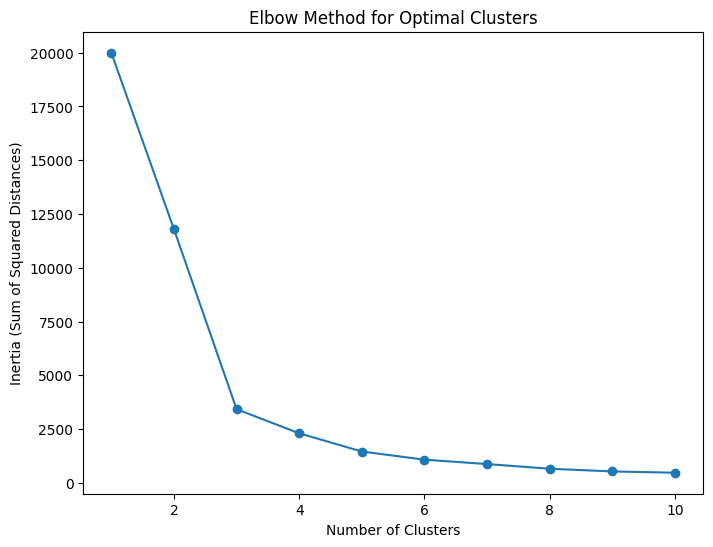

In [43]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select features for clustering
features = ['CLV', 'avg_spend_per_transaction']
data_for_clustering = data[features]

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_for_clustering)

# Elbow Method
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.show()


### K-Means Model

After identifying the optimal clusters, you can fit the K-Means model and assign cluster labels

In [44]:
# Assuming optimal clusters are found at k = 4
kmeans = KMeans(n_clusters=4, random_state=42)
data['cluster_kmeans'] = kmeans.fit_predict(data_scaled)

# Display cluster labels
print(data[['CLV', 'avg_spend_per_transaction', 'cluster_kmeans']].head())


        CLV  avg_spend_per_transaction  cluster_kmeans
0 -0.474707                  -0.479867               0
1  0.257226                  -0.535953               0
2 -0.236107                  -0.505171               0
3 -0.474707                  -0.515621               0
4 -0.469171                   1.092088               1


## Hierarchical Clustering

Build Dendrogram

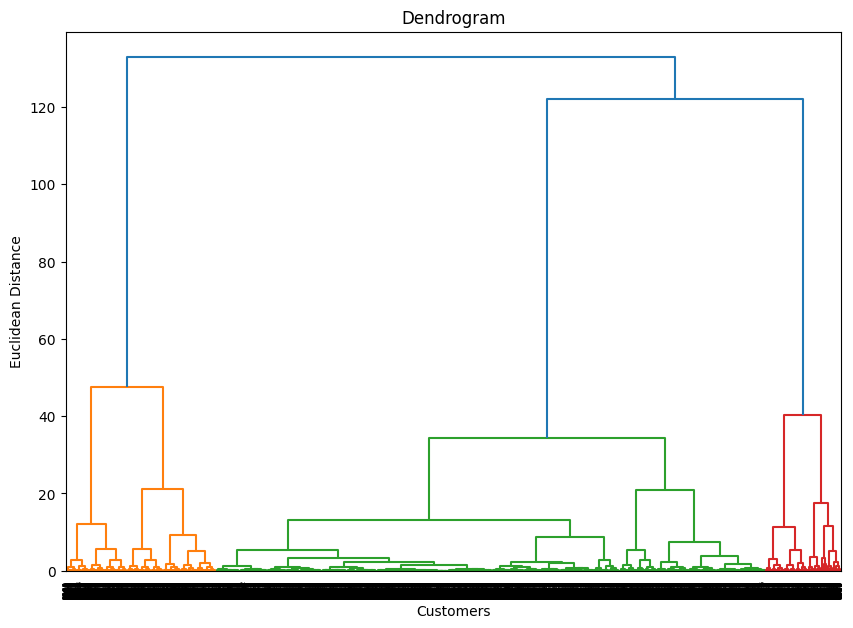

In [45]:
import scipy.cluster.hierarchy as sch

# Dendrogram
plt.figure(figsize=(10, 7))
sch.dendrogram(sch.linkage(data_scaled, method='ward'))  # You can try 'single', 'complete', 'average'
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distance')
plt.show()


### Fit Hierarchical Clustering

In [46]:
from sklearn.cluster import AgglomerativeClustering

# Fit Agglomerative Clustering (Hierarchical Clustering)
hierarchical = AgglomerativeClustering(n_clusters=4, linkage='ward')  # Remove 'affinity' argument
data['cluster_hierarchical'] = hierarchical.fit_predict(data_scaled)

# Display results
print(data[['CLV', 'avg_spend_per_transaction', 'cluster_hierarchical']].head())


        CLV  avg_spend_per_transaction  cluster_hierarchical
0 -0.474707                  -0.479867                     2
1  0.257226                  -0.535953                     2
2 -0.236107                  -0.505171                     2
3 -0.474707                  -0.515621                     2
4 -0.469171                   1.092088                     3


## DBSCAN (Density-Based Spatial Clustering of Applications with Noise)


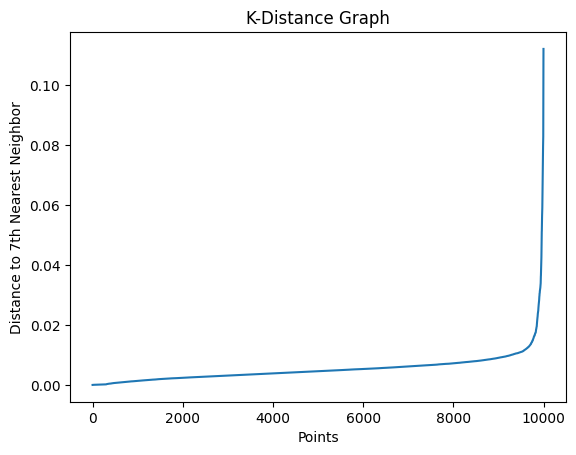

In [47]:
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

# NearestNeighbors to find the distance to the 7th nearest neighbor
nbrs = NearestNeighbors(n_neighbors=7).fit(data_scaled)
distances, indices = nbrs.kneighbors(data_scaled)

# Sort distances to plot the k-distance graph
distances = np.sort(distances[:, -1], axis=0)

# Plot the K-distance graph
plt.plot(distances)
plt.xlabel("Points")
plt.ylabel("Distance to 7th Nearest Neighbor")
plt.title("K-Distance Graph")
plt.show()

In [48]:
# DBSCAN with the tuned parameters
from sklearn.cluster import DBSCAN

# DBSCAN with new parameters
dbscan = DBSCAN(eps=0.1, min_samples=7)
data['cluster_dbscan_improved'] = dbscan.fit_predict(data_scaled)

In [49]:
print(data[['CLV', 'avg_spend_per_transaction', 'cluster_dbscan_improved']].head())

        CLV  avg_spend_per_transaction  cluster_dbscan_improved
0 -0.474707                  -0.479867                        0
1  0.257226                  -0.535953                        0
2 -0.236107                  -0.505171                        0
3 -0.474707                  -0.515621                        0
4 -0.469171                   1.092088                        0


In [50]:
# Handle and analyze noise points (outliers labeled as -1)
noise_points = data[data['cluster_dbscan_improved'] == -1]
print("Noise Points (Outliers):")
print(noise_points)

Noise Points (Outliers):
Empty DataFrame
Columns: [age, gender, income_bracket, customer_city, customer_state, customer_zip_code, avg_purchase_value, purchase_frequency, avg_discount_used, loyalty_program, product_category, quantity, online_purchases, in_store_purchases, avg_items_per_transaction, month_of_year, days_since_last_purchase, app_usage, website_visits, social_media_engagement, preferred_store, membership_years, churned, total_transactions, purchase_frequency_numeric, CLV, avg_spend_per_transaction, cluster_kmeans, cluster_hierarchical, cluster_dbscan_improved]
Index: []


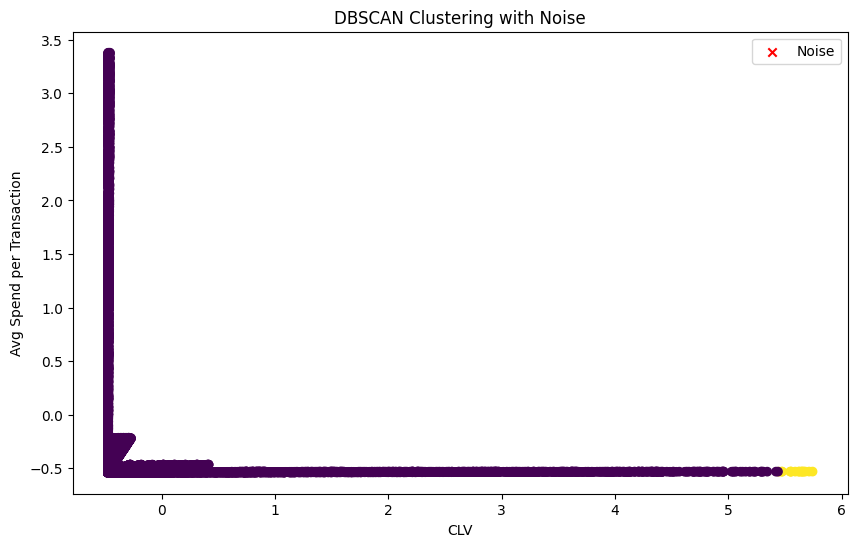

In [51]:
# DBSCAN results with noise points
plt.figure(figsize=(10, 6))
plt.scatter(data['CLV'], data['avg_spend_per_transaction'], c=data['cluster_dbscan_improved'], cmap='viridis')
plt.scatter(noise_points['CLV'], noise_points['avg_spend_per_transaction'], color='red', label='Noise', marker='x')
plt.title("DBSCAN Clustering with Noise")
plt.xlabel("CLV")
plt.ylabel("Avg Spend per Transaction")
plt.legend()
plt.show()

In [52]:
from sklearn.metrics import silhouette_score

silhouette_dbscan = silhouette_score(data_scaled, data['cluster_dbscan_improved'])
print(f"Silhouette Score for DBSCAN: {silhouette_dbscan}")

Silhouette Score for DBSCAN: 0.7158449385228647


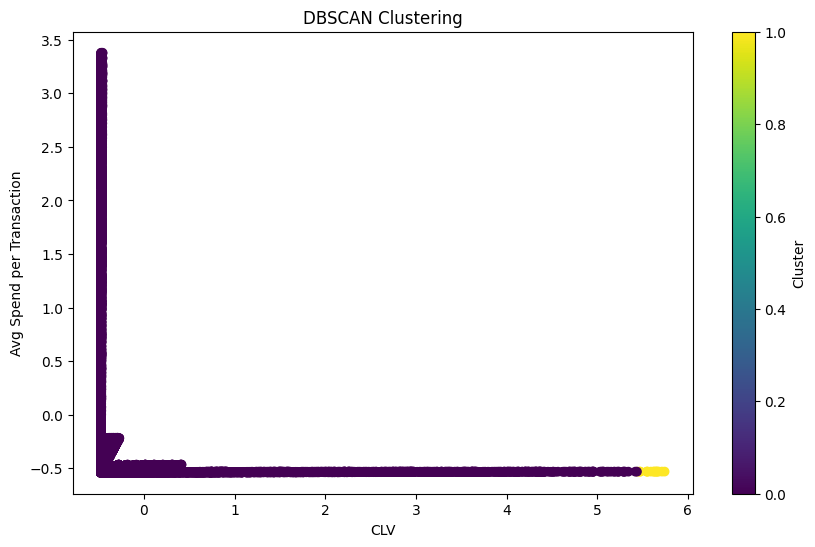

In [53]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(data['CLV'], data['avg_spend_per_transaction'], c=data['cluster_dbscan_improved'], cmap='viridis')
plt.title("DBSCAN Clustering")
plt.xlabel("CLV")
plt.ylabel("Avg Spend per Transaction")
plt.colorbar(label='Cluster')
plt.show()


In [54]:
cluster_summary = data.groupby('cluster_dbscan_improved').agg(
    avg_CLV=('CLV', 'mean'),
    avg_spend_per_transaction=('avg_spend_per_transaction', 'mean'),
    total_customers=('cluster_dbscan_improved', 'count')
).reset_index()
print(cluster_summary)


   cluster_dbscan_improved   avg_CLV  avg_spend_per_transaction  total_customers
0                        0 -0.008979                   0.000851             9984
1                        1  5.603038                  -0.531157               16


In [55]:
dbscan = DBSCAN(eps=0.1, min_samples=7)
data['cluster_dbscan_improved'] = dbscan.fit_predict(data_scaled)


eps defines the maximum distance between two samples for them to be considered as in the same neighborhood. min_samples is the number of samples in a neighborhood for a point to be considered a core point.

## Evaluate the Clustering Results

### Compute Silhouette Score

In [56]:
from sklearn.metrics import silhouette_score

# Compute silhouette score for K-Means clustering
silhouette_kmeans = silhouette_score(data_scaled, data['cluster_kmeans'])
print(f'Silhouette Score for K-Means: {silhouette_kmeans}')

# Compute silhouette score for Hierarchical clustering
silhouette_hierarchical = silhouette_score(data_scaled, data['cluster_hierarchical'])
print(f'Silhouette Score for Hierarchical Clustering: {silhouette_hierarchical}')

# Compute silhouette score for DBSCAN with the improved clustering
silhouette_dbscan = silhouette_score(data_scaled, data['cluster_dbscan_improved']) if len(set(data['cluster_dbscan_improved'])) > 1 else -1
print(f'Silhouette Score for DBSCAN: {silhouette_dbscan}')


Silhouette Score for K-Means: 0.703085588850862
Silhouette Score for Hierarchical Clustering: 0.673633895974756
Silhouette Score for DBSCAN: 0.7158449385228647


cluster_dbscan_improved
 0    9930
 1      34
 2      18
 3      12
 4       5
-1       1
Name: count, dtype: int64


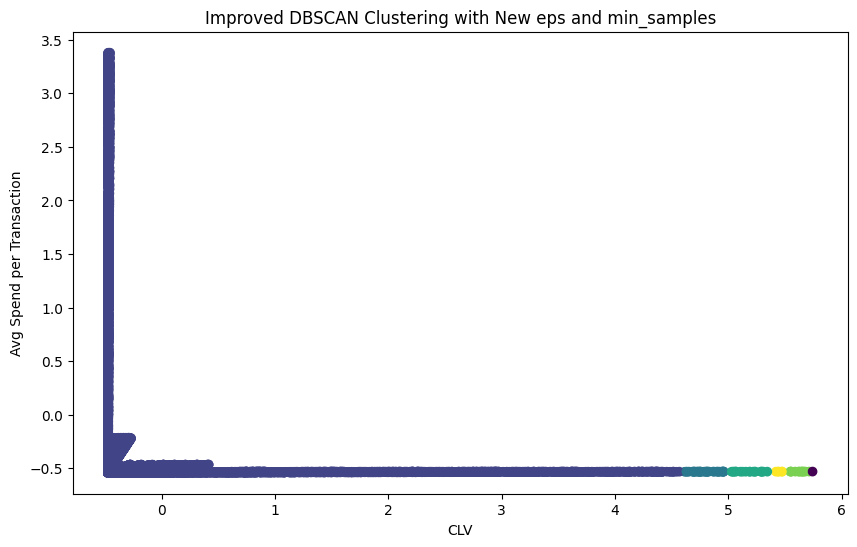

In [57]:
# tuning DBSCAN parameters
dbscan_improved = DBSCAN(eps=0.05, min_samples=5)
data['cluster_dbscan_improved'] = dbscan_improved.fit_predict(data_scaled)
print(data['cluster_dbscan_improved'].value_counts())

# DBSCAN clusters
plt.figure(figsize=(10, 6))
plt.scatter(data['CLV'], data['avg_spend_per_transaction'], c=data['cluster_dbscan_improved'], cmap='viridis')
plt.title("Improved DBSCAN Clustering with New eps and min_samples")
plt.xlabel("CLV")
plt.ylabel("Avg Spend per Transaction")
plt.show()


In [58]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# Adjust parameters for DBSCAN
dbscan = DBSCAN(eps=0.1, min_samples=7)
data['cluster_dbscan'] = dbscan.fit_predict(data_scaled)

print(data[['CLV', 'avg_spend_per_transaction', 'cluster_dbscan']].head())
print(data['cluster_dbscan'].value_counts())

# Compute silhouette score for DBSCAN
silhouette_dbscan = silhouette_score(data_scaled, data['cluster_dbscan']) if len(set(data['cluster_dbscan'])) > 1 else -1
print(f'Silhouette Score for DBSCAN: {silhouette_dbscan}')


        CLV  avg_spend_per_transaction  cluster_dbscan
0 -0.474707                  -0.479867               0
1  0.257226                  -0.535953               0
2 -0.236107                  -0.505171               0
3 -0.474707                  -0.515621               0
4 -0.469171                   1.092088               0
cluster_dbscan
0    9984
1      16
Name: count, dtype: int64
Silhouette Score for DBSCAN: 0.7158449385228647


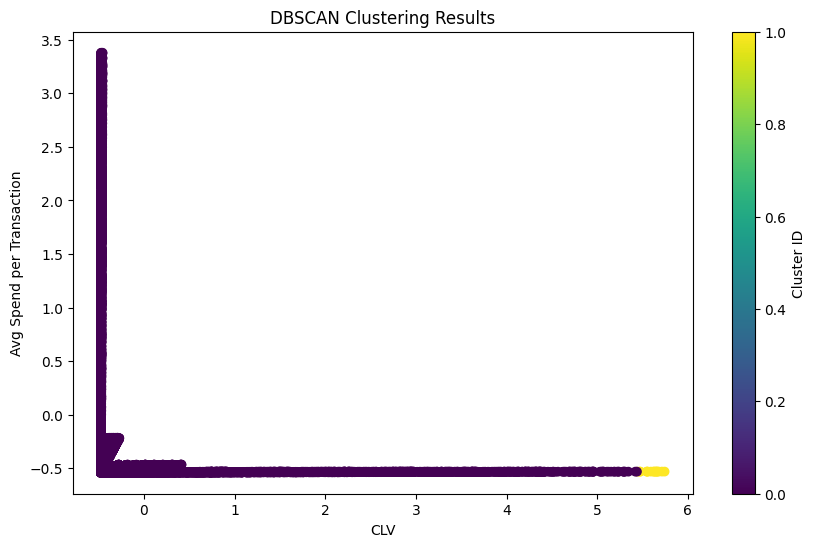

In [59]:
plt.figure(figsize=(10, 6))
plt.scatter(data['CLV'], data['avg_spend_per_transaction'], c=data['cluster_dbscan'], cmap='viridis')
plt.title("DBSCAN Clustering Results")
plt.xlabel("CLV")
plt.ylabel("Avg Spend per Transaction")
plt.colorbar(label="Cluster ID")
plt.show()


In [60]:
cluster_1_points = data[data['cluster_dbscan'] == 1]
print(cluster_1_points)


           age  gender  income_bracket  customer_city  customer_state  customer_zip_code  avg_purchase_value  purchase_frequency  avg_discount_used  loyalty_program product_category  quantity  online_purchases  in_store_purchases  avg_items_per_transaction  month_of_year  days_since_last_purchase app_usage  website_visits social_media_engagement  preferred_store  membership_years  churned  total_transactions  purchase_frequency_numeric       CLV  avg_spend_per_transaction  cluster_kmeans  cluster_hierarchical  cluster_dbscan_improved  cluster_dbscan
541   0.540984       2             0.5              1               0              12469            0.966488                 0.0               0.48                0      Electronics     0.750          0.757576            0.878788                   0.371111             11                  0.664835    Medium               6                     Low                1               1.0        0                  13                         365  5.5

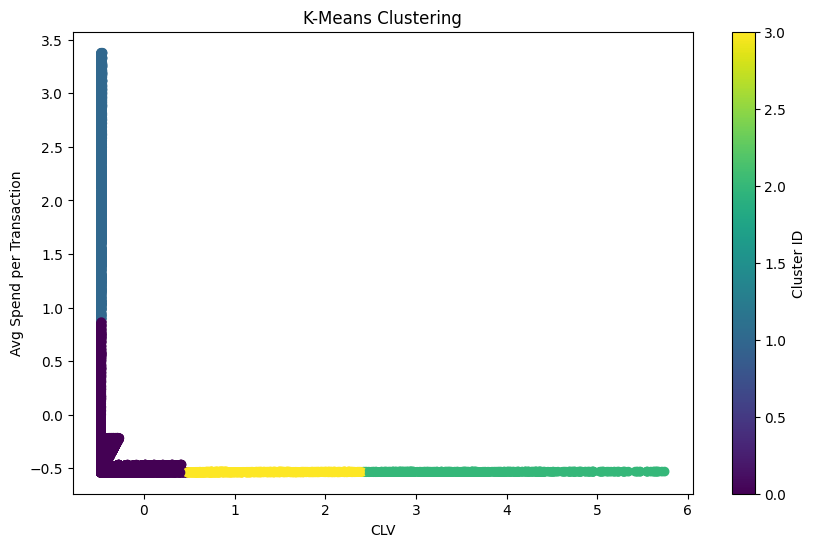

In [61]:
plt.figure(figsize=(10, 6))
plt.scatter(data['CLV'], data['avg_spend_per_transaction'], c=data['cluster_kmeans'], cmap='viridis')
plt.title("K-Means Clustering")
plt.xlabel("CLV")
plt.ylabel("Avg Spend per Transaction")
plt.colorbar(label="Cluster ID")
plt.show()




### Analyze Cluster Centroids (for K-Means)

In [62]:
# Display K-Means centroids
centroids = kmeans.cluster_centers_
print("K-Means Centroids:")
print(centroids)

K-Means Centroids:
[[-0.32495745 -0.37435713]
 [-0.46889216  2.14254316]
 [ 3.54246612 -0.53313117]
 [ 1.28894433 -0.5356146 ]]


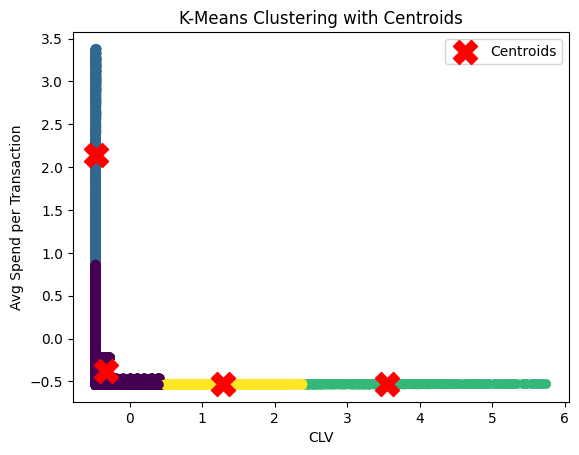

In [63]:
plt.scatter(data['CLV'], data['avg_spend_per_transaction'], c=data['cluster_kmeans'], cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', marker='X', label='Centroids')
plt.title("K-Means Clustering with Centroids")
plt.xlabel("CLV")
plt.ylabel("Avg Spend per Transaction")
plt.legend()
plt.show()


### Analyze Intra-cluster Distances (for K-Means)

In [64]:
# Calculate intra-cluster distances for K-Means
intra_cluster_distances = []
for cluster in range(4):  # Assuming 4 clusters
    cluster_points = data_scaled[data['cluster_kmeans'] == cluster]
    distances = np.linalg.norm(cluster_points - centroids[cluster], axis=1)
    intra_cluster_distances.append(distances.mean())

print("Intra-cluster distances for K-Means:", intra_cluster_distances)


Intra-cluster distances for K-Means: [0.26187810022144214, 0.6315788588731066, 0.6921805899303103, 0.4806547857130714]


# Visualization of Clusters

1. PCA for Dimensionality Reduction:

2. t-SNE for Dimensionality Reduction:


In [65]:
from sklearn.decomposition import PCA

data_encoded = pd.get_dummies(data, drop_first=True)

print("Missing values before handling:\n", data_encoded.isnull().sum())

for col in data_encoded.columns:
    if data_encoded[col].dtype == 'object':
        mode_value = data_encoded[col].mode()
        if not mode_value.empty:
            data_encoded[col].fillna(mode_value[0], inplace=True)
    else:
        data_encoded[col].fillna(data_encoded[col].median(), inplace=True)

print("\nMissing values after handling:\n", data_encoded.isnull().sum())


Missing values before handling:
 age                               0
gender                            0
income_bracket                    0
customer_city                     0
customer_state                    0
customer_zip_code                 0
avg_purchase_value                0
purchase_frequency                0
avg_discount_used                 0
loyalty_program                   0
quantity                          0
online_purchases                  0
in_store_purchases                0
avg_items_per_transaction         0
month_of_year                     0
days_since_last_purchase          0
website_visits                    0
preferred_store                   0
membership_years                  0
churned                           0
total_transactions                0
purchase_frequency_numeric        0
CLV                               0
avg_spend_per_transaction         0
cluster_kmeans                    0
cluster_hierarchical              0
cluster_dbscan_improved        

C:\Users\Mayank Meghwal\AppData\Local\Temp\ipykernel_24336\774710416.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_encoded[col].fillna(data_encoded[col].median(), inplace=True)
C:\Users\Mayank Meghwal\AppData\Local\Temp\ipykernel_24336\774710416.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting value

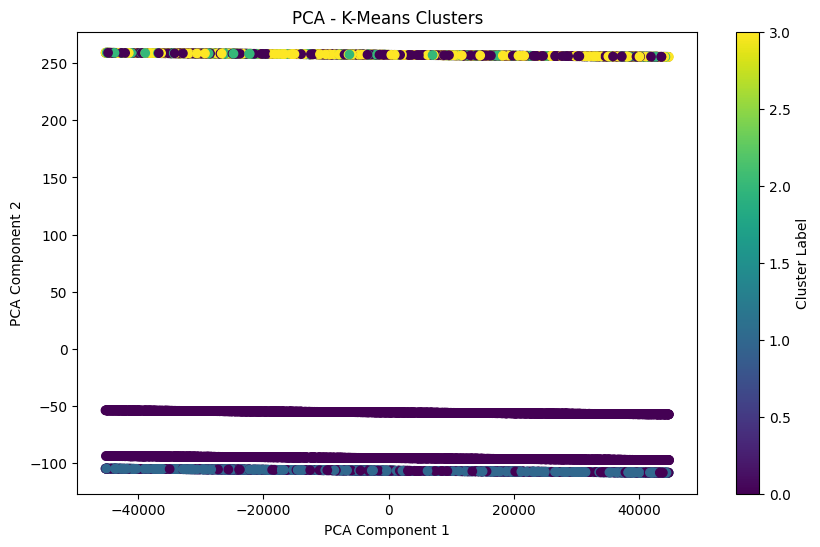

In [66]:
columns_to_drop = ['cluster_kmeans', 'cluster_hierarchical', 'cluster_dbscan_improved', 'cluster_dbscan']
columns_to_drop = [col for col in columns_to_drop if col in data_encoded.columns]

pca = PCA(n_components=2)
pca_components = pca.fit_transform(data_encoded.drop(columns=columns_to_drop))

plt.figure(figsize=(10, 6))
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=data['cluster_kmeans'], cmap='viridis', marker='o')
plt.title('PCA - K-Means Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster Label')
plt.show()

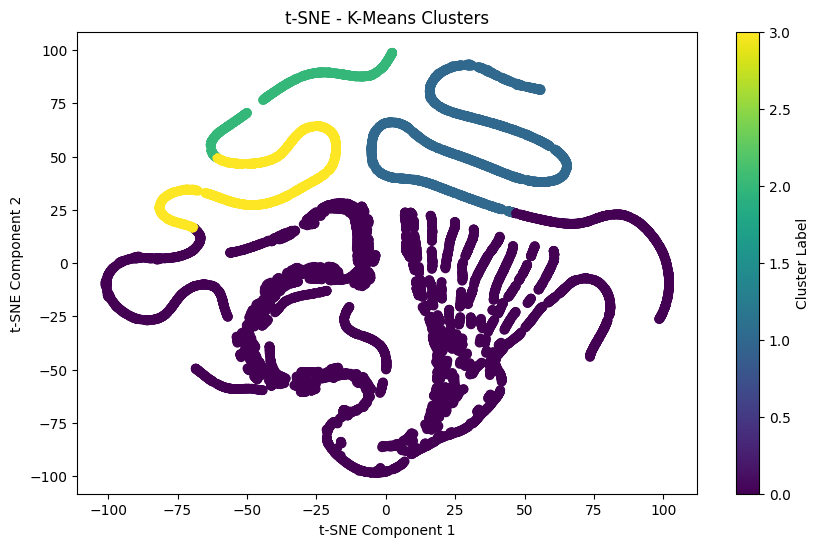

In [67]:
from sklearn.manifold import TSNE

# Reduce data to 2D using t-SNE
tsne = TSNE(n_components=2)
tsne_components = tsne.fit_transform(data_scaled)

# K-Means clusters using t-SNE
plt.figure(figsize=(10, 6))
plt.scatter(tsne_components[:, 0], tsne_components[:, 1], c=data['cluster_kmeans'], cmap='viridis', marker='o')
plt.title('t-SNE - K-Means Clusters')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar(label='Cluster Label')
plt.show()

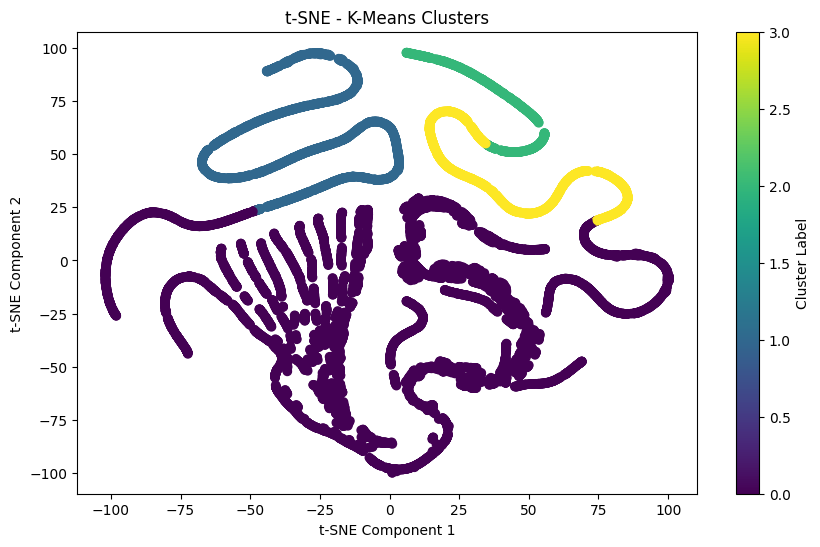

In [68]:
# Reduce data to 2D using t-SNE
tsne = TSNE(n_components=2)
tsne_components = tsne.fit_transform(data_scaled)

# Plot K-Means clusters using 2D t-SNE
plt.figure(figsize=(10, 6))
plt.scatter(tsne_components[:, 0], tsne_components[:, 1], c=data['cluster_kmeans'], cmap='viridis', marker='o')
plt.title('t-SNE - K-Means Clusters')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar(label='Cluster Label')
plt.show()



In [69]:
import joblib
joblib.dump(kmeans, 'kmeans_model.pkl')


['kmeans_model.pkl']

In [70]:
data['cluster_kmeans'] = kmeans.labels_
data.to_csv('segmented_customers.csv', index=False)


# Business Insights and Recommendations

## 1. Cluster 1: Price-Sensitive Customers
- **Customer Characteristics**:
    - **Demographics**: Likely to be price-conscious, possibly lower income or younger age groups.
    - **Spending Habits**: Prefer lower-priced items and look for deals, discounts, or special offers.
    - **Key Features**: Higher frequency of discount usage, lower average purchase value, and preference for low-cost products.
  
- **Personalized Marketing Recommendations**:
    - **Discounts**: Offer special discounts, coupons, or flash sales.
    - **Targeted Campaigns**: Send targeted emails with the best deals or discounted bundles.
    - **Promotions**: Promote loyalty programs to encourage repeat purchases.

---

## 2. Cluster 2: High-Value Premium Customers
- **Customer Characteristics**:
    - **Demographics**: High-income individuals, often older with stable careers or disposable income.
    - **Spending Habits**: Tend to purchase premium products and make high-value purchases.
    - **Key Features**: Higher spend per transaction, buying premium or luxury items, lower purchase frequency.

- **Personalized Marketing Recommendations**:
    - **Premium Products**: Promote exclusive, premium products and early access to new launches.
    - **Personalized Services**: Provide VIP shopping services, tailored product recommendations.
    - **Exclusive Discounts**: Offer loyalty discounts or early-bird promotions.

---

## 3. Cluster 3: Frequent and Loyal Buyers
- **Customer Characteristics**:
    - **Demographics**: Frequent buyers, likely varying in income level but show strong brand loyalty.
    - **Spending Habits**: Purchase frequently but make lower-value purchases.
    - **Key Features**: Higher transaction frequency, smaller average purchase value.

- **Personalized Marketing Recommendations**:
    - **Loyalty Rewards**: Offer special rewards for repeat purchases and loyalty-based discounts.
    - **Subscription Models**: Suggest subscription-based products to encourage more frequent purchases.
    - **Referral Programs**: Encourage referrals with discounts or loyalty points.

---

## 4. Cluster 4: Occasional Buyers
- **Customer Characteristics**:
    - **Demographics**: Less frequent buyers, often younger or in transitional life stages.
    - **Spending Habits**: Make occasional purchases, often driven by specific needs or promotions.
    - **Key Features**: Low frequency of purchase, influenced by external factors such as sales events.

- **Personalized Marketing Recommendations**:
    - **Seasonal Promotions**: Target them with seasonal discounts or limited-time offers.
    - **Targeted Emails**: Send product recommendations based on past purchases.
    - **Discounts for New Purchases**: Offer a discount on their next purchase to bring them back.

---

## Example Marketing Strategies Based on Clusters
- **Cluster 1**: Use **email campaigns** focusing on **seasonal discounts** or **price comparisons**.
- **Cluster 2**: Promote **exclusive offers**, **premium products**, and **early access** to new products.
- **Cluster 3**: Use **loyalty programs**, **personalized offers**, and **referral bonuses** to keep them engaged.
- **Cluster 4**: Send **timely reminders** of promotions, **exclusive offers**, and **product suggestions** based on previous purchases.

---

## Key Metrics to Track for Each Cluster:
- **Customer Lifetime Value (CLV)**: Estimate the total revenue a customer from each cluster will bring over time.
- **Churn Rate**: Track how frequently customers from each cluster stop making purchases.
- **Engagement Metrics**: Track how clusters respond to personalized campaigns (e.g., email open rates, click-through rates).
